<h1>EDA</h1>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CHEATER_DIR = "../data/processed/features/cheater"
NON_CHEATER_DIR = "../data/processed/features/legit"
os.makedirs(CHEATER_DIR, exist_ok=True)
os.makedirs(NON_CHEATER_DIR, exist_ok=True)

In [4]:
def load_data(directory):
    dfs = []
    try:
        for file in os.listdir(directory):
            if file.endswith('.csv'):
                df = pd.read_csv(os.path.join(directory, file))
                dfs.append(df)
        return pd.concat(dfs, ignore_index=True)
    except FileNotFoundError:
        print(f"Directory {directory} not found. Creating empty DataFrame.")
        return pd.DataFrame()

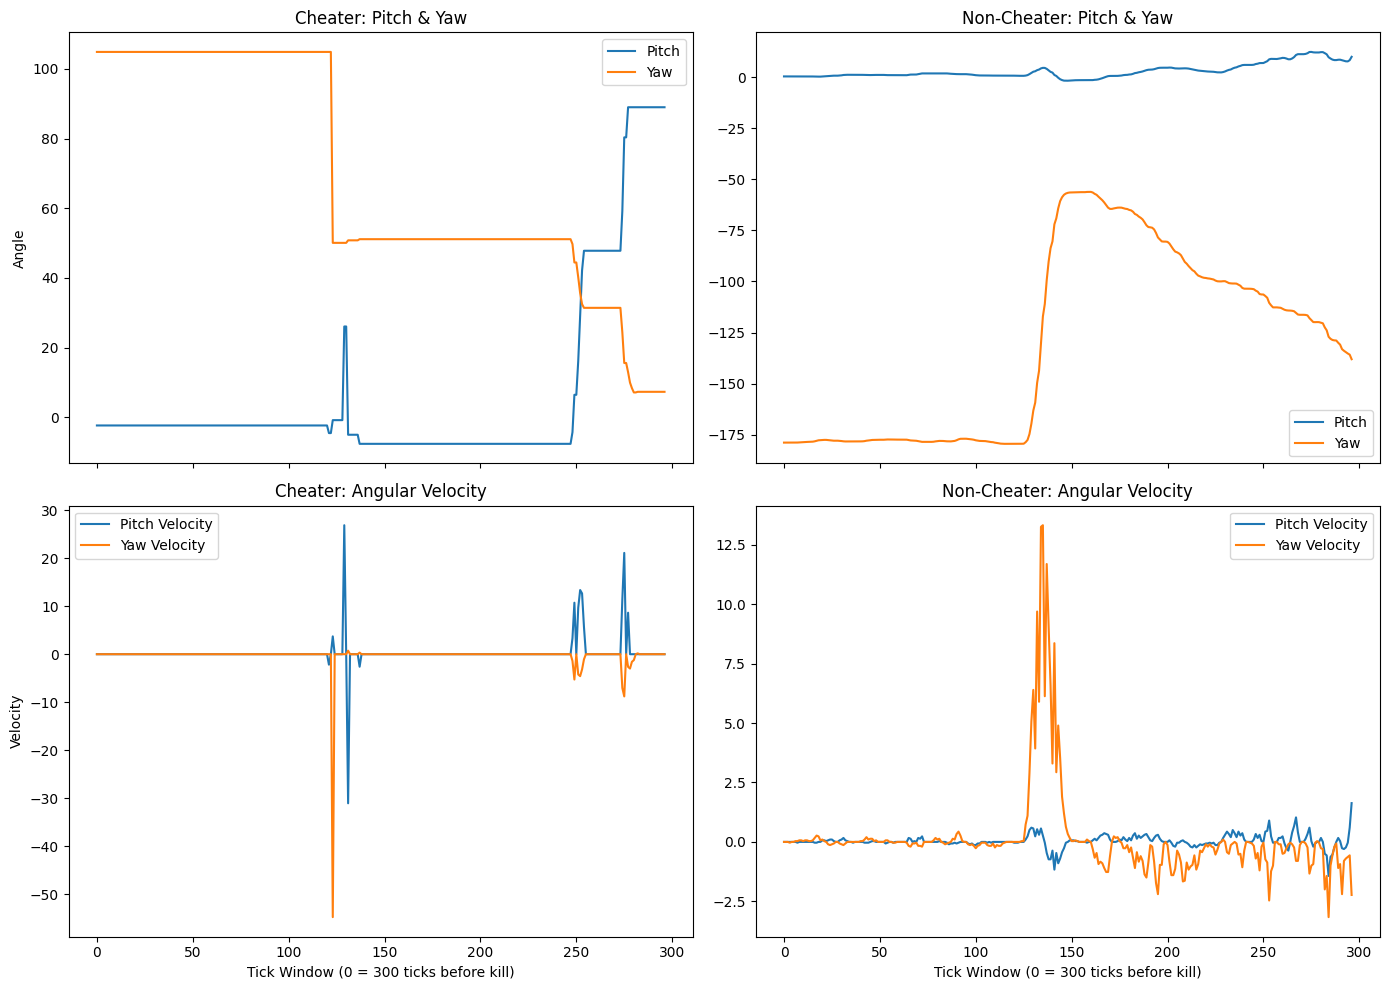

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one engineered CSV for each
cheater_file = '/content/drive/MyDrive/Skripsi/data/processed/features/cheater/engineered_thesis_test_cheat_kill_1604_to_1904.csv'
non_cheater_file = '/content/drive/MyDrive/Skripsi/data/processed/features/legit/engineered_Copy of cheater(xxx)_kill_13108_to_13408.csv'

cheater_df = pd.read_csv(cheater_file).reset_index(drop=True)
noncheater_df = pd.read_csv(non_cheater_file).reset_index(drop=True)

# Create a 0-300 x-axis (or up to the length of your data)
cheater_x = cheater_df.index
noncheater_x = noncheater_df.index

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Cheater Pitch/Yaw
axs[0,0].plot(cheater_x, cheater_df['pitch'], label='Pitch')
axs[0,0].plot(cheater_x, cheater_df['yaw'], label='Yaw')
axs[0,0].set_title('Cheater: Pitch & Yaw')
axs[0,0].set_ylabel('Angle')
axs[0,0].legend()

# Non-cheater Pitch/Yaw
axs[0,1].plot(noncheater_x, noncheater_df['pitch'], label='Pitch')
axs[0,1].plot(noncheater_x, noncheater_df['yaw'], label='Yaw')
axs[0,1].set_title('Non-Cheater: Pitch & Yaw')
axs[0,1].legend()

# Cheater Velocity
axs[1,0].plot(cheater_x, cheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,0].plot(cheater_x, cheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,0].set_title('Cheater: Angular Velocity')
axs[1,0].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,0].set_ylabel('Velocity')
axs[1,0].legend()

# Non-cheater Velocity
axs[1,1].plot(noncheater_x, noncheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,1].plot(noncheater_x, noncheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,1].set_title('Non-Cheater: Angular Velocity')
axs[1,1].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,1].legend()

plt.tight_layout()
plt.show()

<h1>Correlation Matrix between Features</h1>

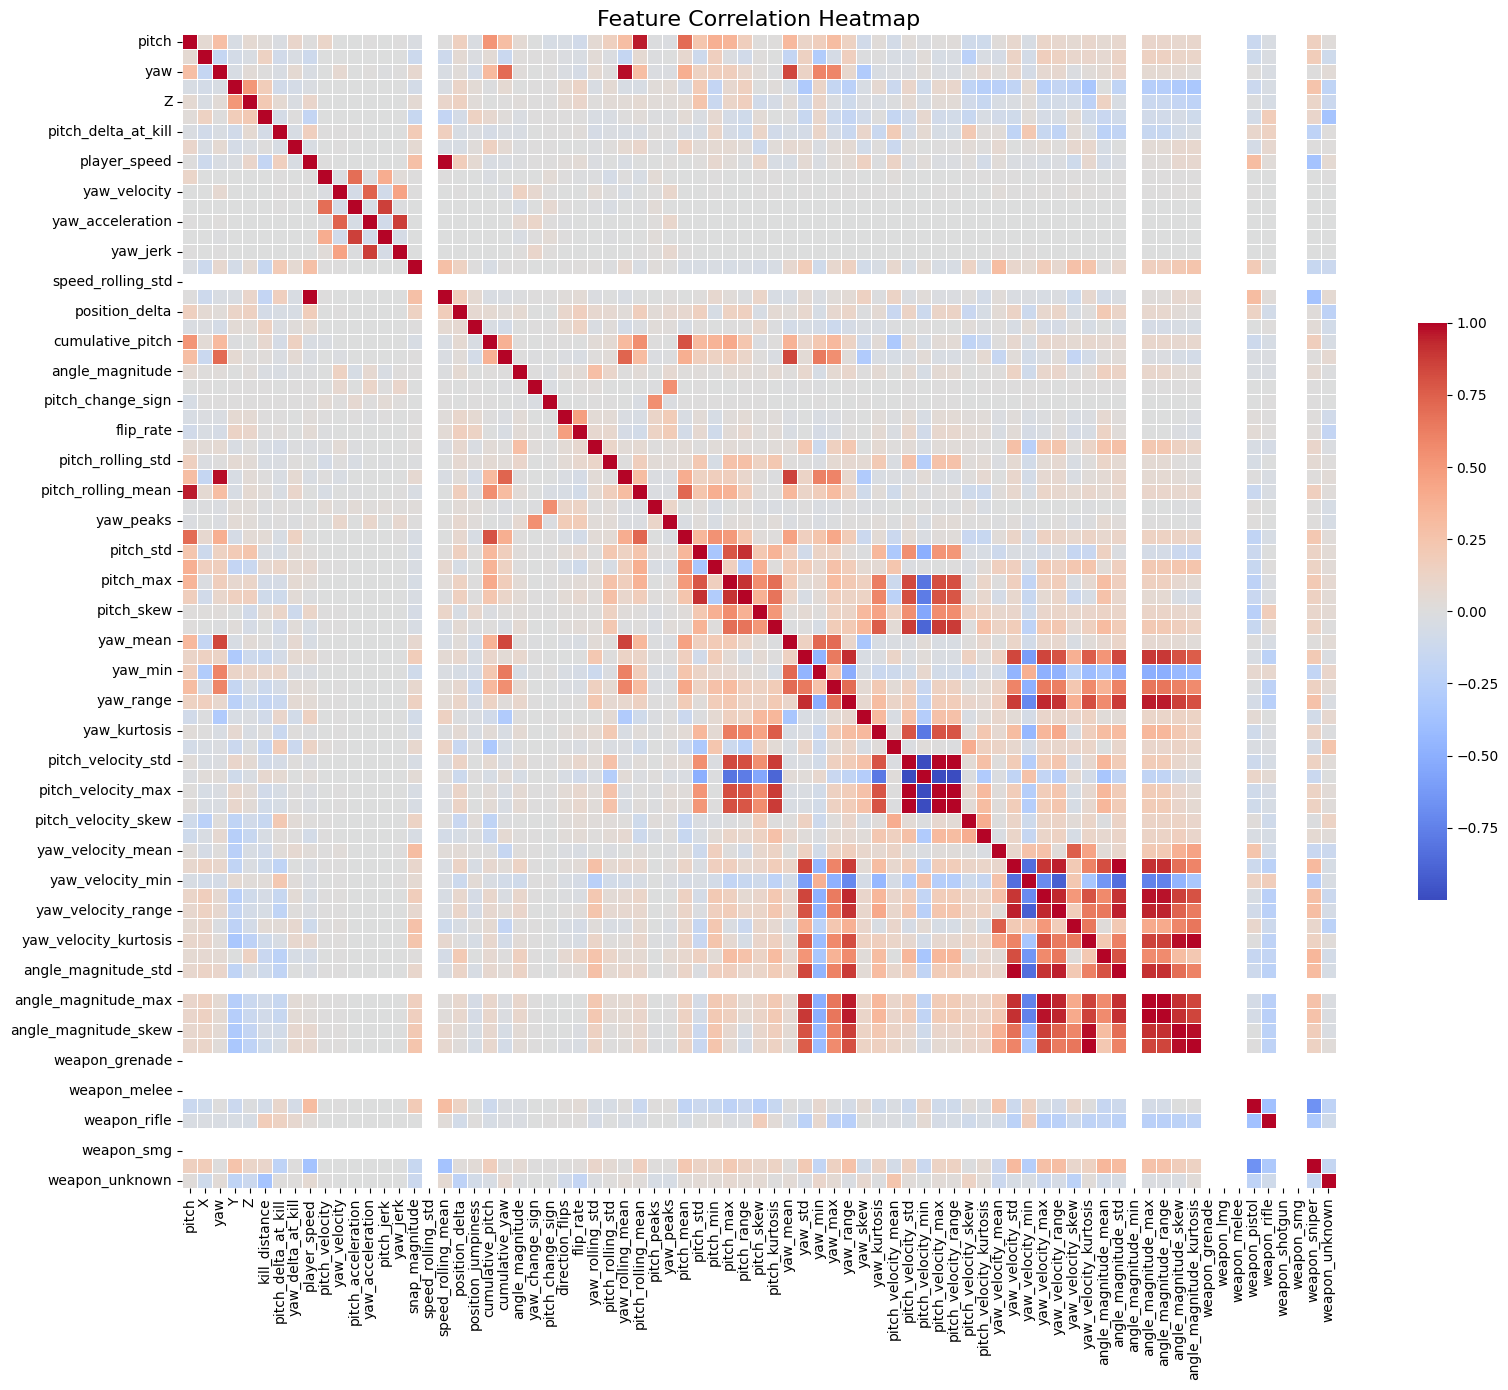

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load multiple CSVs into a single DataFrame
import glob
import os

# Adjust this path to your legit + cheater processed directory
processed_dir = "../data/processed/features"
all_csv_files = glob.glob(os.path.join(processed_dir, "**/*.csv"), recursive=True)

# Load and concatenate a few for performance
dfs = []
for i, file in enumerate(all_csv_files):
    if i >= 100:  # limit to 100 samples to avoid memory issues
        break
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# ✅ Drop non-numeric / irrelevant columns
non_numeric = ['tick', 'steamid', 'label', 'weapon_name', 'weapon_type', 'name']
combined_df = combined_df.drop(columns=[col for col in non_numeric if col in combined_df.columns])

# ✅ Compute the correlation matrix
corr_matrix = combined_df.corr()

# ✅ Plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .5}
)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


<h1>Correlation Matrix against Results</h1>

/tmp/ipykernel_35169/3729116445.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlation_with_label.index, x=correlation_with_label.values, palette="coolwarm")


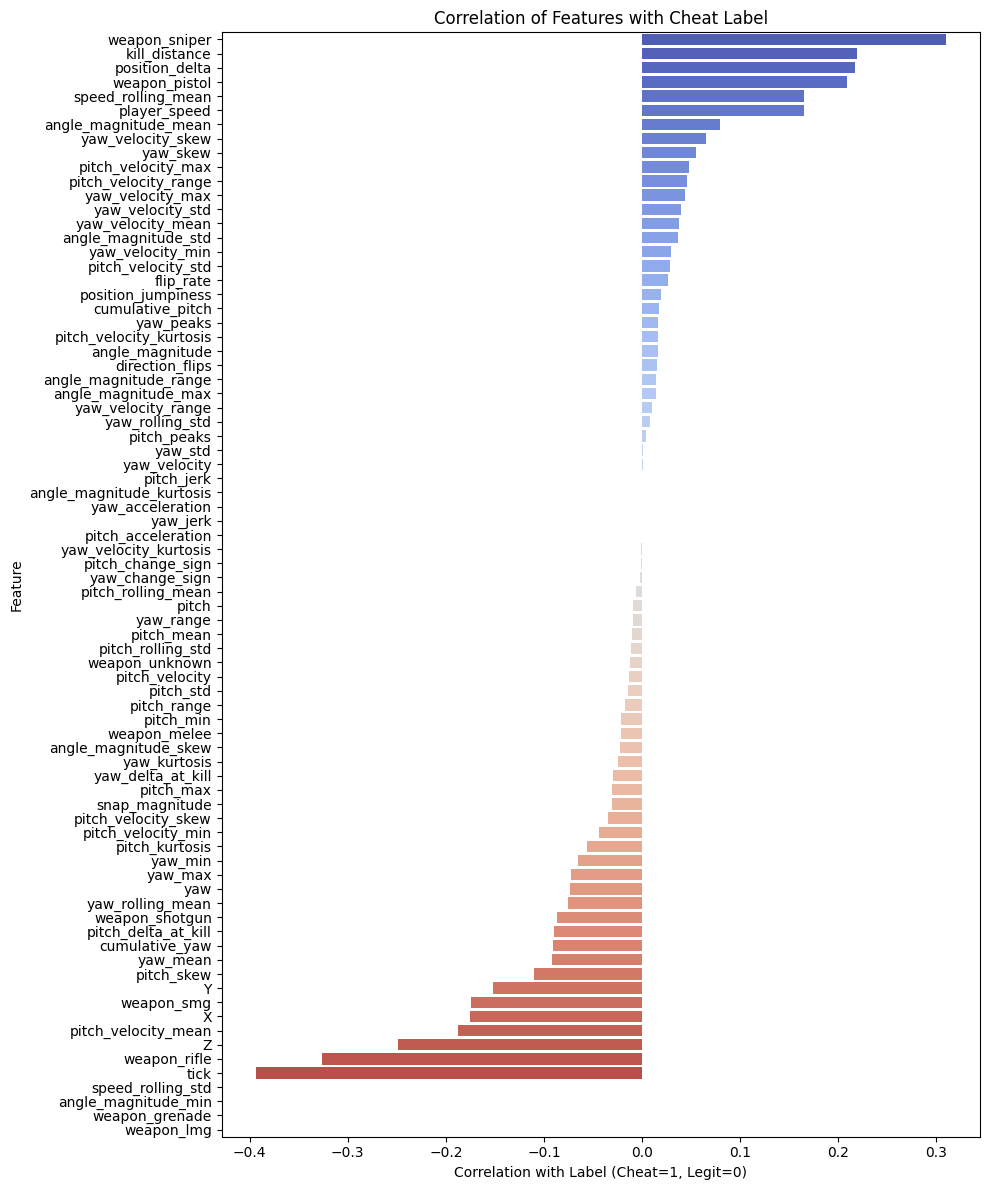

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed CSVs
all_files = []
processed_dir = "../data/processed/features"
for category in ["cheater", "legit"]:
    category_path = os.path.join(processed_dir, category)
    for file in os.listdir(category_path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(category_path, file))
            all_files.append(df)

full_df = pd.concat(all_files, ignore_index=True)

# Drop non-numeric or irrelevant columns for correlation
corr_df = full_df.drop(columns=["steamid", "name", "weapon_name", "weapon_type"], errors="ignore")
corr_df = corr_df.dropna()

# Compute correlation with the 'label' column
correlation_with_label = corr_df.corr(numeric_only=True)["label"].drop("label").sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(y=correlation_with_label.index, x=correlation_with_label.values, palette="coolwarm")
plt.title("Correlation of Features with Cheat Label")
plt.xlabel("Correlation with Label (Cheat=1, Legit=0)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
